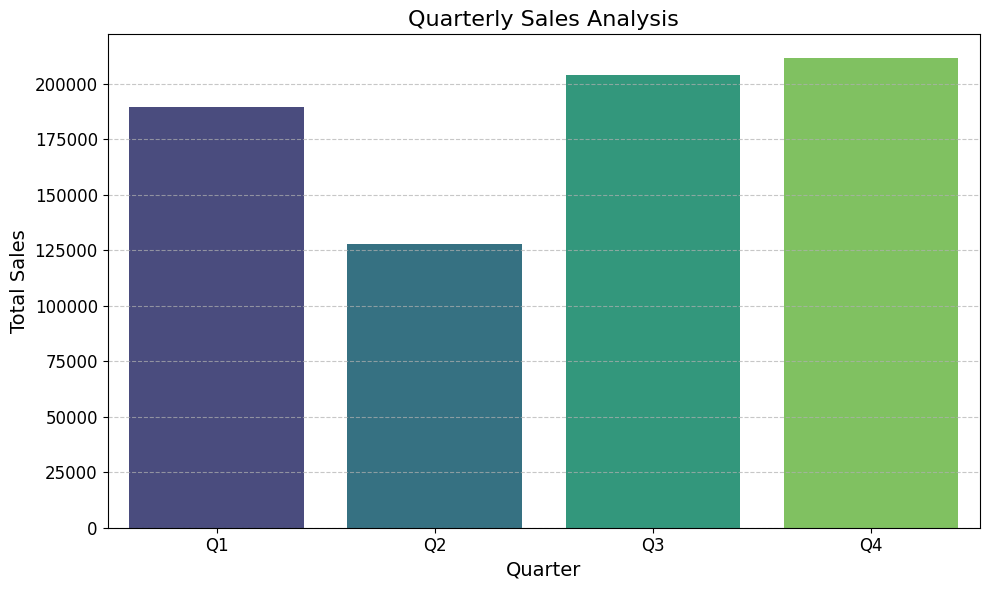

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Try loading the data with 'ISO-8859-1' encoding
try:
    df = pd.read_csv('/content/US  E-commerce records 2020.csv', parse_dates=['Order Date'], encoding='ISO-8859-1')
except Exception as e:
    error = str(e)

# Check if the data is loaded successfully or return the error
df.head() if 'df' in locals() else error

# Using the provided SQL query, simulate the extraction of quarterly sales data
quarterly_sales = df.groupby(
    pd.cut(
        df['Order Date'].dt.month,
        bins=[0,3,6,9,12],
        labels=['Q1','Q2','Q3','Q4']
    )
)['Sales'].sum().reset_index()

# Plotting the quarterly sales data
plt.figure(figsize=(10,6))
sns.barplot(data=quarterly_sales, x='Order Date', y='Sales', palette='viridis')
plt.title('Quarterly Sales Analysis', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()